# A (very) brief introduction to Machine learning key concepts

## TOC 

- [Supervised and unsupervised learning](#Supervised-and-unsupervised-learning)
- [Bias, Variance and Over-/Under-fitting](#Bias,-Variance,-over/under-fitting)
- [Cross-validation (CV)](#Cross-validation):
    *  [How do we compare models based on training and CV substets?](#How-do-we-compare-models-based-on-training-and-CV-substets?)
    * [Do we need more data? Learning curves](#Do-we-need-more-data?-Learning-Curves)
- Binary classification: [Confusion matrix and False/true-positives](#Binary-classification,-confusion-matrix,-and-true/false-positives)
    * [Generative and discriminative classification](#Generative-and-discriminative-classification)
    * [ROC curve](#Receiver-Operating-Characteristic-curve-aka-ROC-curve)
    

![](https://imgs.xkcd.com/comics/machine_learning.png)
(c) [XKCD](https://xkcd.com/1838)

## Supervised and unsupervised learning 

### Supervised learning: 

This is the task of learning a function that maps input attributes to an outcome value based on a set of **training** examples. 

What does it mean? In general terms this means that you make predictions about "something" (a discrete value, a continuous value or a label) based on a model that you have applied to a given data set, generally called your **training sample**. 

In that framework, the "regression" problem that we have seen earlier enters that category, and is a very basic (but important) machine learning task. Like [Mr Jourdain](https://en.wikipedia.org/wiki/Le_Bourgeois_gentilhomme) who was doing prosody without knowing, we have been doing machine learning "without knowing". To moderate a bit this statement, I should add that in general one however speaks of machine learning when **large / very large data set(s)** are used (big-data problem). Machine learning effectively strongly benefits / makes a strong usage of this information encompassed in the data. The theoretical fundation of the field are statistics and therefore a good understanding of statistics is required to make a sensible use of machine learning machinery or to develop new machine learning algorithms.    

![../Figures/ML_regression.png](../Figures/ML_regression.png)

The other big family of "problem" dealt by machine learning are  **classification** problems for which one trains an algorithm on a data set and predicts the classification for another data set and (often) closely related **clustering** problems (searching clusters of data points sharing the same properties):
- Disentangle between a star and a quasar based on multi-band magnitudes. 
- Recognising dogs from cats, galaxies of various types in a field, ... 
- ... 

![](../Figures/supervised-vs-unsupervised-ml.png)
(c) [Wu 2019](https://assets.extrahop.com/images/blogart/supervised-vs-unsupervised-ml.png) 

A non exhaustive list of important algorithms used in supervised learning are: 

- k-nearest neighbours
- Regression trees 
- Linear regression
- Support vector Machine
- Artificial neural networks (complex non linear regression function)
- ... 

The key module in python for basic machine learning (not deep learning) is [scikit-learn](https://scikit-learn.org/stable/). There is a lot of documentation associated with that module, included a [tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) and a [glossary](https://scikit-learn.org/stable/glossary.html) to handle some of the jargon used in the documentation. 


### Unsupervised learning 

Supervised learning learning requires a data set for which the data have been labeled / tagged by an expert. The training is based on this external knowledge given to the machine. For unsuperivsed learning, patterns are learned from unlabeled data. The hope is that the computer will create a statistically meaningful representation of the world based on data by identifying structures. These unsupervised algorithm are generally based on some kind of artificial neural networks but beware, that artificial neural network (ANN) does not imply unsupervised learning. ANN are simply a class of machine learning algorithm. They can be trained on labeled data, or used in the framework of unsupervised tasks. The "deep blue" machine that has beaten the Chess Master Gary Kasaparov had been trained on a large variety of "chess games" (to some extent deep blue mostly benefited of a big data base rather than advanced machine learning). This was a supervised algorithm. Later on, other algorithm have been devised, where the computer was "playing agains himself" knowing how to move chess pieces, or playing Go, as in the case of "Alpha Go" (and its subsequent versions). In that case the learning is unsupervised. 

## Bias, Variance, over/under-fitting 

Now that we know that regression is at the heart of many many machine learning tasks, and is used to make predictions, let's dive a bit deeper into it and see how the model complexity influences the prediction. 
Before anything, let's note that one never trains a model on a full data set but splits the latter in three subsets: 
- A **training** set: typically $\sim$ 50-70% of the sample. This is the sample on which the model is first train. 
- A **(cross)-validation** set: typically half of the remaining sample. We'll see below the usefulness of this subsample. 
- A **test set**: The other half of the remaining sample. This is a sample "unseen by the model" on which the model efficacy is tested. 


For simplicity, let's first frame the problem as follows and ignore the validation set whose usefulness will appear clearer below. We have in hands a **training sample** consisting of $X_{\rm train}$, $y_{\rm train}$.  We then have a test set of $X_{\rm test}$ for which we want to predict $y_{\rm test}$. 

Let's consider an example data set generated based on the following underlying "ground truth model": 

$$y_i = x_i \sin(x_i) + \epsilon_i,$$

whith $$0\le x_i \le 3$$, 

and the noise, $\epsilon_i$ is given by $\mathscr{N}(0,0.1)$ (we assume homoscedastic errors).

The next cell implements this example. Let's first use a straight line as our regression model.

Note that in machine learning, the $(x_i, y_i)$ do not have to be numerical values. One could consider $X$ as values of the magnitude of an object in 5-bands/filter, and $y_i$ as a label $(star, quasar)$. In such a case, the test set would be constituted of values of magnitudes for each object but without any associated label.  

In [1]:
# Ivezic v2, Figure 8.12, Modified by DS 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#from matplotlib import ticker
#from matplotlib.patches import FancyArrow
from matplotlib import pyplot as plt 
import numpy as np 
%matplotlib inline 

#------------------------------------------------------------
# Define the functional form of our ground truth
def func(x, dy=0.1):
    return np.random.normal(np.sin(x) * x, dy)

#------------------------------------------------------------
# select the (noisy) data 
np.random.seed(0)
# Let'generate 20 x values regularly spaced btw 0 and 3 w. 0 < xi < 3
x = np.linspace(0, 3, 22)[1:-1]  
dy = 0.1
y = func(x, dy)

#------------------------------------------------------------
# Let's consider that we also have another data set of 20 points 
# We'll use it later and call it cross validation data set 
np.random.seed(1)
x_cv = 3 * np.random.random(20)  # Random x between 0 and 3
y_cv = func(x_cv)

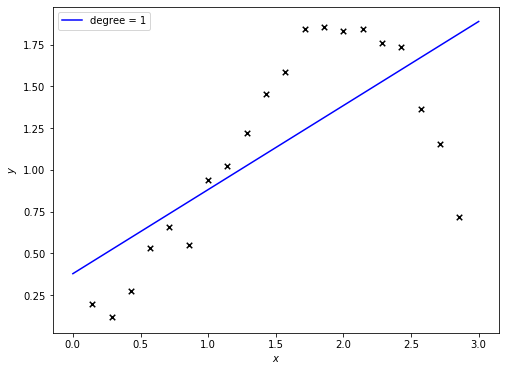

In [2]:
#------------------------------------------------------------
# First figure: plot points with the fit of a straight line
f, ax = plt.subplots(ncols=1, figsize=(8, 6))

ax.scatter(x, y, marker='x', c='k', s=30)

p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 3, 1000)  # The grid of points over which we plot our model
y_fit = np.polyval(p, x_fit)

ax.plot(x_fit, y_fit, '-b', label = "degree = 1")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend()

This model **underfits** the data and is said to be "biased" (in the sense that the estimated model parameters deviate significantly from the true model parameters). To quantify this bias, one can use various kinds of merit function. For some reasons, in machine learning, uncertainties on data points are often ignored / implicitely assumed to be the same. This is not systematic. A common merit function that is used is the **mean square error (MSE)** defined as: 

$$
\epsilon = \frac{1}{N} \sum_i^N (y_i - y_M(x_i))^2
$$

As it is used to compare models applied to the **same data**, its absolute meaning may not be too critical. Instead of merit function, one also speak of **metric**, which simply means a quantity that allows one to make quantitative comparisons between regressions. 

Note here that criteria also exist in the Bayesian framework to compare models of different complexities and assess which of the model reproducing equally well the data should be favoured (See e.g. Sec. 5.4 and 4.3 of our [book](#book) for details). Two of these criteria are the Aikake Information Criterion (**AIC**) and the Bayesian Information Criterion (**BIC**). Those criteria rely on information theory and comparison of likelihood between models. The BIC can be calculated based on the maximum value of the data likelihood $L^0(M)$ of a model $M$. Its formula is given by: 

$$
BIC \equiv -2\ln{[L^0(M)]} + k \, \ln{N},
$$

where $k$ is the number of model parameters and $N$ the number of data points. The AIC is a bit more expensive to calculate than the BIC, but makes less assumption regarding the posterior/likelihood of the parameters. Those criteria are best used to compare models with different number of parameters when small data sets are in hands. 

A straight line is a polynomial of order 1, so let's try polynomials of higher order.

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, '$y$')

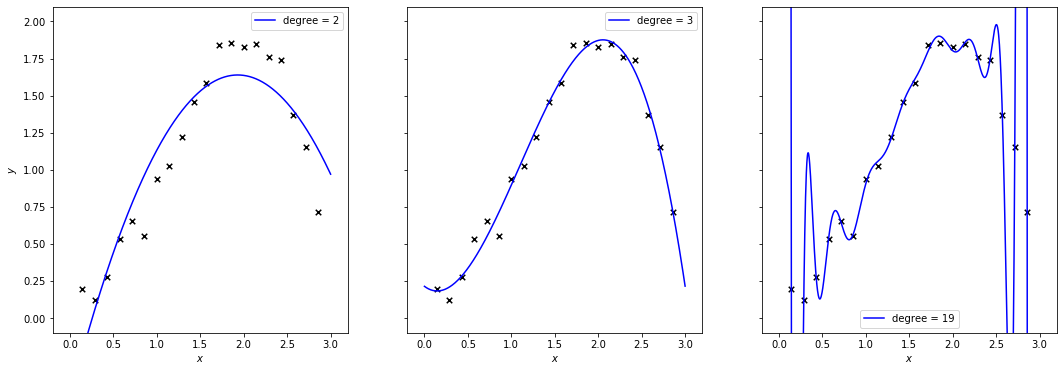

In [3]:
# Ivezic v2, Figure 8.13, modified by DS 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#------------------------------------------------------------
# Second figure: plot fit for several orders of polynomial
f, ax = plt.subplots(ncols=3, figsize=(18, 6), sharey=True)

for i, d in enumerate([2, 3, 19]):  #Try 2nd, 3rd and 19th order
    ax[i].scatter(x, y, marker='x', c='k', s=30)

    p = np.polyfit(x, y, d)
    y_fit = np.polyval(p, x_fit)

    ax[i].plot(x_fit, y_fit, '-b', label='degree = %i'%d)
    ax[i].set_ylim(-0.1, 2.1)
    ax[i].set_xlim(-0.2, 3.2)   
    ax[i].set_xlabel('$x$')
    ax[i].legend()
    
ax[0].set_ylabel('$y$')

We see that the degree 2 polynomial provides a better fit (si it is less biased),  and order 3 an even better one (almost unbiased). The degree 19 fit is also unbiased but reproduces all the points perfectly. It is what we would call an **overfit**. This latter model is also said to have a **high variance**: this means that the model best-parameters will change substantially if you make small perturbation to one of the data points. A diagnostic of high variance is therefore to compare the same high variance model will change. 

As for "standard regression", one may ask **how do we choose our model / what is the "right" answer?**. The main objective is to find a trade-off between bias, variance and model complexity in an objective way, as illustrated on the following figure: 

![Bias-Variance_complexity_Trade-off.png](../Figures/Bias-Variance_complexity_Trade-off.png)
(c) L. Delchambre


The idea, in machine learning, is to take advantage of the fact that in general **many** data are available and therefore, the idea is to use those other data / a subsample of the original data (*not used for training*) to select the best model based on metrics that reflect bias and variance. This is where cross-validation (one often drop the "cross" prefix) subset enters into the game. 

## Cross-validation 

There are a variety of cross validation strategies (see 8.11.3 of our [book](book)). The simplest one is as described above: one reserves between 15 and 25\% of the sample for cross-validation. 

Another strategy is the **k-fold** cross validation (generally $k$ is about 5 to 10). It works as follows: 

- Split the data into $k+1$ subsets; the test set and $k$ CV sets. How you do this is up to you, but typically through random shufflings with equal numbers of points.
- $k$ models are trained, each time leaving out one of the CV sets in order to measure the CV error.
- The final training and CV error can be computed using the mean or median of the set of results. As often, the median may be more reliable (but it converges more slowly ... so if mean and median are similar, you may consider the mean).
![Cross_validation_sketch](../Figures/Cross_validation_sketch.png)
(c) Amidi et al. Cheat Sheet. 

Note here that we do not see the test set anymore. In fact, the litterature commonly make the (implicit) assumption that you have a separate test set, so discussion focuses on a subset which is consituted of the data that you would use for training *and* cross-validation. 

See the following GIF of $3$-fold CV from the [Wikipedia article](https://www.wikiwand.com/en/Cross-validation_(statistics)).


![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/KfoldCV.gif/1920px-KfoldCV.gif?1616979144969)

### How do we compare models based on training and CV substets? 

The training set is used to determine the model parameters, $\theta_j$. Then the idea is to compare the results of the fit for the training and cross-validation based on some metric that encodes the quality of the fit. The good fit obtained in the above exampled for a `degree = 19` polynomial should be a bad fit with a new subset (i.e. the cross validation). The comparison of a quantity that measures the quality of the fit for the training and the cross validation should allow us to figure it out.  

Hence, we will calculate the MSE, or the square root of the MSE, also called RMS error, for the training ($\epsilon_{\rm tr}$) and cross validation ($\epsilon_{\rm CV}$) samples:

$$
\epsilon_{\rm cv/tr} = \sqrt{\frac{1}{n}\sum_{i=1}^{N_{\rm cv/tr}}
  \left[y_i - \sum_{m=0}^d \theta_0^{(n)}x_i^m\right]^2}
$$

> *Why do we need both a training set and a cross-validation set?* 
> - The **model parameters, $\theta_j$, are learned from the training set**,
> - But the **"hyperparameters" (in this case the model degree) are learned from the cross-validation set**. 

> *The test set then provides the best estimate of the error expected for a new set of unlabeled data.* In other words, the set tells us how well a new model will perform with a new data set. 

We show this graphically in the next figure (Ivezic, 8.14), where the **training and cross-validation rms errors are computed as a function of polynomial degree**, and also compared with the **model BIC**. 

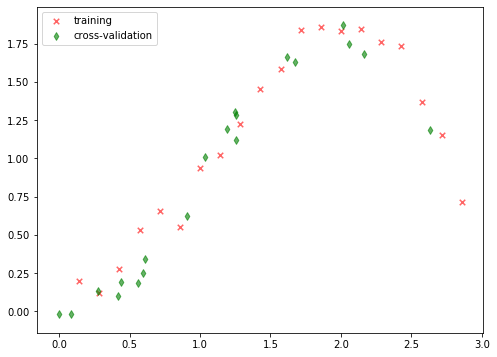

In [4]:
# For this example, we had a cross validation sample 
# Let's visualise it and compare to the original data 
f, ax = plt.subplots(ncols=1, figsize=(8, 6))

ax.scatter(x, y, marker='x', c='r', s=30, alpha=0.6, label='training')
ax.scatter(x_cv, y_cv, marker='d', c='g', alpha=0.6, s=30, label='cross-validation')
ax.legend()

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 576x576 with 0 Axes>

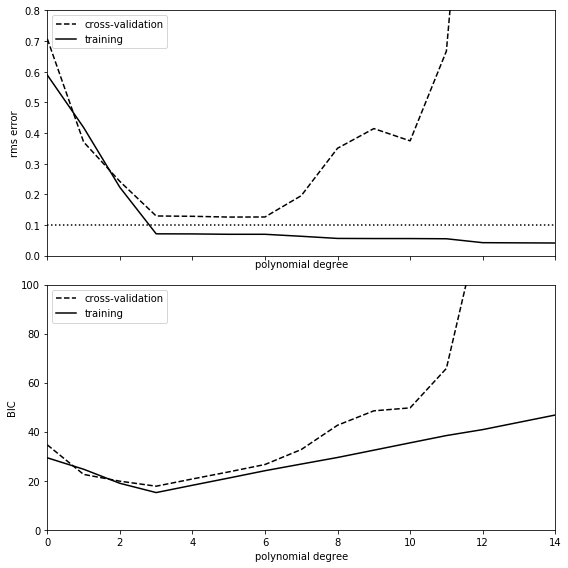

In [5]:
# Ivezic v2, Based on Figure 8.14, Adapted by DS - correct BIC calculation + plot display
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#------------------------------------------------------------
# Let's calculate the RMS for the training and cross validation 
# and compare errors as a function of polynomial degree d

d = np.arange(0, 21)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

fig = plt.figure(figsize=(8, 8))

for i in range(len(d)):
    p = np.polyfit(x, y, d[i])
    # Calculate RMS for the training 
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)
                              / len(y))
    # Calculate RMS for the CV
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

# Calculate the BIC = chi2 + (d+1) ln(N) 
BIC_train = np.sqrt(len(y)) * training_err / dy + (d+1) * np.log(len(y))
BIC_crossval = np.sqrt(len(y_cv)) * crossval_err / dy + (d+1) * np.log(len(y_cv))

#----------------------------------------------
# PLOT of the LEARNING CURVES
f, ax = plt.subplots(nrows=2, figsize=(8, 8), sharex=True)

#RMS error 
ax[0].plot(d, crossval_err, '--k', label='cross-validation')
ax[0].plot(d, training_err, '-k', label='training')
ax[0].plot(d, 0.1 * np.ones(d.shape), ':k')

ax[0].set_xlim(0, 14)
ax[0].set_ylim(0, 0.8)

[ax[j].set_xlabel('polynomial degree') for j in range(2)]; 
ax[0].set_ylabel('rms error')
ax[0].legend(loc=2)

# BIC comparison
ax[1].plot(d, BIC_crossval, '--k', label='cross-validation')
ax[1].plot(d, BIC_train, '-k', label='training')
ax[1].set_ylim(0, 100)
ax[1].legend(loc=2)
ax[1].set_ylabel('BIC')
#plt.tight_layout()

How do we interpret those curves?  

- For low order, both the training and CV error are high. This is sign of a **high-bias model** and that our model is **underfitting** the data.  
- For high order, the training error becomes small (by definition), but the CV error is large. This is the sign of a **high-variance model**. Our model is **overfitting** the data. As we already noticed by visualising the training for high degree polynomial, the model starts to match fluctuations that are not real. The "non reality" of those features is assessed by the CV analysis. 
- The best model is for $d = 3$. 

Hopefully that helps you understand how to use cross validation to help you both **fit your model and decide on the optimal level of model complexity** (provided this makes sense for your problem to compare the model complexity). 

### Do we need more data? Learning Curves

Of course more data means a better fit... but a some point data are all the same!

In general there are several possibilities to improve model fitting: 
- **Get more training data**: this does not always guarantees a better fit. 
- **Use a more/less complicated model**: If more training data do not improve the model, it is likely that the model is a problem. 
- **Use more/less regularization**: Regularisation (a topic we have not really discussed but see [IV.2 of Regression_short_sup.ipynb](05-MLE_and_regression/Regression_short_sup.ipynb)) has typically the same effect as decreasing model complexity. 
- **Increase number of features**: the variance that you have in your model may be explained / caused by a feature which is not part of your current training label (your $y_i$). An example is the Tully-Fisher relation which related galaxy luminosity to their velocity dispersion. This is a rather tight relation with some scatter, but the scatter is reduced when a third observation/parameter (the effective radius of the galaxy) is accounted for (Fundamental plane of galaxies).  

We can use a tool called a **[learning curve](https://en.wikipedia.org/wiki/Learning_curve)** to determine if (for a given model) having more training data would help improve the model fitting. This is a different question than above-- rather than try to get a better model of the data, we're trying to improve the quality of our data set. 

For building the learning curve, the training and CV error are computed as *a function of the number of training points*. In general:
- **The training error increases with $N_\mathrm{train}$.** For a given model, it's easier to fit fewer data points.
- **The CV error decreases wtih $N_\mathrm{train}$.** For a given model, a greater number of training points reduces the chances of over-fitting, resulting in better performance of the model in the cross-validation stage.

Let's look at this for the same data (but with training data and 100 cross validation data) and model as above. **BEWARE** that for this comparison we alway use the **full** cross validation sample (i.e. 100 data points). 

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


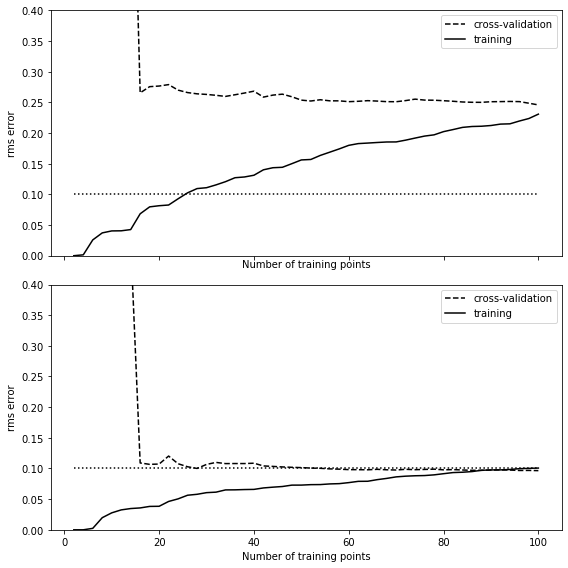

In [8]:
# Ivezic v2, Figure 8.15, Adapted by DS.
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.

# Let's now build a larger training set 
np.random.seed(0)
x = 3 * np.random.random(100)
y = func(x)

# -----------------------------------
# and a larger cross-validation 
np.random.seed(1)
x_cv = 3 * np.random.random(100)
y_cv = func(x_cv)

# ------------------------------------
Nrange = np.arange(2, 101, 2) # Number of points over which we will evaluate the model 

training_err = np.zeros(Nrange.shape)
crossval_err = np.zeros(Nrange.shape)

f, ax = plt.subplots(nrows=2, figsize=(8, 8), sharex=True)

for i, d in enumerate([2, 3]):   # We will calculate the learning curve for degree=2, and degree=3
    for j, N in enumerate(Nrange):
        p = np.polyfit(x[:N], y[:N], d)

        # Calculate RMS for the training 
        training_err[j] = np.sqrt(np.sum((np.polyval(p, x[:N]) - y[:N]) ** 2)
                              / len(y))
        # Calculate RMS for the CV
        crossval_err[j] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

    #----------------------------------------------
    # PLOT of the LEARNING CURVES
    #RMS error 
    ax[i].plot(Nrange, crossval_err, '--k', label='cross-validation')
    ax[i].plot(Nrange, training_err, '-k', label='training')
    ax[i].plot(Nrange, dy * np.ones(Nrange.shape), ':k') # intrinsic scatter in the original data
    ax[i].set_xlabel('Number of training points')
    ax[i].set_ylabel('rms error')
    ax[i].legend(loc='best')
    ax[i].set_ylim(0, 0.4)

plt.tight_layout()

There are two possible regimes that we also see on the above figures:

1. ***The training and CV errors have converged:*** (bottom pannel, $N_{\mathrm {train}} > 70$, and to some extent upper panel, around $N_{\mathrm {train}} \sim 100$) This indicates that the model is "dominated by bias". Increasing the number of training points is futile. If the error is too high (upper pannel; bias is non zero), you instead need a more complex model, not more training data. Decrease regularisation (if present) may also help. 

2. ***The training error is smaller than the CV error:*** (typically $N_{\mathrm {train}} < 70$, but for sure $N_{\mathrm {train}} < 14$) This indicates that the model is dominated by variance (this is often associated to overfitting).  Increasing the number of training points may help to improve the model. Increase the amplitude of the regularisation  (if present) may also help. 

The sharp transition in the relative difference of rms error between the training and cross validation for both cases around $N_{\mathrm {train}} \sim 14$ nicely illustrates the asset of adding data points. 

#### Caveats: 

It is important to look at the learning curve for various model complexities. In that sense, the learning curve and the rms error plotted as a function of the degree polynomial are very complementary and one should look at both of them together. Another more critical caveat is a the implicit assumption on the statistical properties of the data points: the analysis above implicitly assumes that the training, cross validation and test sets have the **same statistical properties** (e.g. the same uncertainties affect the data points). If this is not the case, then those diagnostic plots will provide incorrect conclusions. This is also one of the reason why an important step of any machine learning analysis consists in **understanding and censoring** your data: check for the presence of outliers, of missing data, of non relevant features (i.e. remove features/labels that are irrelevant for the problem).    

You can find methods in [sklearn.model_selection.learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) to calculate learning curve an perform model selection. After digging a bit into it, you'll see that various metrics are implemented in sklearn to compare models as described in the [sklearn model evaluation help](https://scikit-learn.org/stable/modules/model_evaluation.html). An overview (and description) of the metric functions available in sklearn (for various supervised problems) is given [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). 

## Binary classification, confusion matrix, and true/false positives

Classification can either be unsupervised or supervised. We'll focus here on the supervised classification where we have data points with a variety of properties (e.g. an object is tall, short, red, blue, ...) and we want to develop a relationship between the label and the property of the source. 

### Generative and discriminative classification

One often does a distinction between two different types of classification. As an example, if you are trying to determine whether your neighbor is speaking Spanish or Portuguese, you could 1) learn both Spanish and Portuguese so that you'd know exactly what they are saying or 2) learn the keys rules about the differences between the languages.

- If we find ourselves asking which category is most likely to generate the observed result, then we are using using (probability) **density estimation** (you derive the probability density associated to each category) for classification and this is referred to as **generative classification**. Here we have a full model of the density for each class or we have a model which describes how data could be generated from each class. 

- If we don't care about the full distribution, then we are doing something more like clustering (i.e. searching for clusters of points in a n-dimensional space), where we don't need to map the distribution, we just need to define *boundaries*.  Classification that finds the **decision boundary** that separates classes is called **discriminative classification**. For high-dimensional data, this may be a better choice.

For example, in the figure below, to classify a new object with $x=1$, it would suffice to know that either 
1. model 1 is a better fit than model 2 (***generative classification***), or 
2. that the decision boundary is at $x=1.4$ (***discriminative classification***).

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)

In this introduction, we will not discuss the main techniques used for classification. We want however to explain how results of binary classification are commonly interpreted. Let's put us in the position where we have obtained the results of a binary classification. We assign a class 1 if the object is of the type of interest, and a 0 otherwise. For example we assigne a 1 for QSOs in a QSO-star classification and 0 otherwise; or we assign a 1 for an apple in case of a Apple-Orange classification problem. To analyse the results, we can build a confusion matrix (as done also for hypothesis testing ... remember the test of positivity to a disease). 


|N  | 1 (truth)| 0 (truth)  |   
|---|----|----|
| 1 (predicted)| True Positive = TP | False Positive = FP |
| 0 (predicted)| False Negative = FN | True Negative = TN | 


Let's suppose that we aim at identifying if an fruit is an apple (+1). Then, four situations can occur, among which two are classification **errors**: 

- **True Positive (TP)** I have correctly assigned the label to my object. I say that I have an apple, and it is an apple. One speaks of a **True Positive (TP)**. 
- **True Negative (TN)** I yet have correctly rejected my object: it does not have the label of the class that I am "testing". I have an orange and I say that it is **not an apple**. 
- **[False Positive](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_positive_error) (FP)**, where we have assigned a *true* class label when it is really false. We have classified as an apple but it is an orange ---> ***Type-1 error***.
* **[False Negative](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_positive_error) (FN)**, where we have assigned a *false* class label when it is really true. We have an apple but we label it as an *not-apple* ---> ***Type-2 error***.

![](../Figures/False_True_positive_sketch.png)

(c) [Wikipedia](https://en.wikipedia.org/wiki/File:Precisionrecall.svg)

Based on these, we usually define either of the following pairs of terms.  Which is used is largely a matter of preference in different fields (astronomy often uses completeness and contamination).

| Name| Formula   | Definition        | Usage |  
| --- |-----------|-------------------|------|
|**Completeness** or **True Positive Rate (TPR)** or **sensitivity** or **recall** | $\frac{\rm TP}{\rm TP + FN}$ |  Fraction of positive instances correctly identified | ML, Astro | 
|**Contamination** of **False DISCOVERY rate** | $\frac{\rm FP}{\rm TP + FN}$ |  Fraction of positive instances correctly identified | Astro |
| **False positive rate (FPR)**| $\frac{\rm FP} {\rm TP + FP}$ | Fraction of negative instances falsely classified as positive | ML, Astro | 
| **Accuracy** | $\frac{\rm TP + TN } {\rm N}$ | Fraction of instances correctly classified| ML, Astro | 
| **Precision** or **efficiency** $\equiv$ 1 - contamination | $\frac{\rm TP} {\rm TP + FP}$ | Fraction of positive instances among the predicted positive | ML, Astro | 

|                         |                      |
|-------------------------|----------------------| 
|![](../Figures/False_True_positive_sketch.png) | ![](../Figures/Precision_recall_Sketchonly.png)| 


(c) [Wikipedia](https://en.wikipedia.org/wiki/File:Precisionrecall.svg)

Depending on your goals, you may want to maximize the completeness or the efficiency, or a combination of both. In the latter case, the [F-score](https://en.wikipedia.org/wiki/F-score) provides an interesting metric: it is the harmonic mean between precision ($\equiv$1-contamination) and recall (=completeness): 

$$
F_1 = \frac{2}{{\rm {recall}}^{-1} + {\rm {precision}}^{-1}} = 2\, \frac{{\rm {recall}} * {\rm {precision}}}{{\rm {recall}} + {\rm {precision}}}
$$

If you do not want to give the same weight to both, you can use the $F_\beta$ score (see [sklearn.metric.fbeta_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html)): 

$$
F_\beta = (1 + \beta^2) \frac{{\rm {recall}} * {\rm {precision}}}{{\rm {recall}} + \beta^2 * {\rm {precision}}}
$$


Here is an alternative visual summary of those quantities with naming often used in machine learning
![](../Figures/ClassificationJPG.JPG)

To better understand the differences between these measures, let's take the needle in a haystack problem.  You have 100000 stars and 1000 quasars but you do not know which are which. Fotunately, you have devised a classifier that correctly identifies 900 quasars as such and mistake 1000 stars for quasars. In that case, we have:

| N = 101000 | QSO  | Star | 
| -----------|------|------|
| QSO        | TP = 900  | FP = 1000 | 
| STAR       | FN = 100 | TN = 99000 | 

Which gives

$$
{\rm true\ positive\ rate} = \frac{900}{900 + 100} = 0.9 = {\rm completeness}
$$

$$
{\rm false\ positive\ rate} = \frac{1000}{99000 + 1000} = 0.01
$$

Not bad right?  Well, sort of.  The FPR isn't bad, but there are *lots* of stars, so the contamination rate isn't so great.

$$
{\rm contamination} = \frac{1000}{900 + 1000} = 0.53
$$

This may remind you the warning we draw a few lectures ago regarding rare events. In general, if you are planning to follow up some objects to confirm them as being in a class or another, you may want to minimise your contamination. There is often a trade off to be found between completeness and efficiency (=1-contamination). As for the regression problem, there are diagnostic plots that allow you to compare classifiers, this is the **ROC curve** (see below).  

### Receiver Operating Characteristic curve aka ROC curve 

"Best" performance is subjective; we trade contamination versus completeness depending on the science. (N.B.  We have skipped ahead to Sect. 9.9 of our [Izevic et al.](#book)).  

We do this with a [**Receiver Operating Characteristic (ROC)**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve. **A ROC curve simply plots the true-positive rate (or recall) vs. the false-positive rate.**

One concern about ROC curves is that they are sensitive to the relative sample sizes. As we already demonstrated above, **if there are many more background events than source events, small false positive results can dominate a signal.** For these cases ***we can plot completeness versus efficiency (1 - contamination).***

Here is a comparison of the two types of plots (Don't mind too much the different labels, they correspond to various classifiers for a specific problem ; See [astroML website](https://www.astroml.org/astroML-notebooks/chapter9/astroml_chapter9_Classification.html#comparing-the-performance-of-classifiers) for the code generating this figure):

![Ivezic, Figure 9.17](http://www.astroml.org/_images/fig_ROC_curve_1.png)

Here we see that to get higher completeness, you could actually suffer significantly in terms of efficiency, but your FPR might not go up that much if there are lots of true negatives.

Note that you ***choose*** the completeness and efficiency that you want by choosing a **threshold (decision boundary)**. The curves show you what your possible choices are (depending on where you set the threshold). Generally, you want to **chose a decision boundary that maximizes the area under the ROC curve (AUC)** .

The following scikit-learn modules allow you to generate ROV and precision-recall curves: 
- [sklearn.metrics.roc_curve(y_test, y_prob)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.precision_recall_curve(y_test, y_prob)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)


## To move forward

One of the hardest part of solving a machine learning problem is finding the right estimator for the job. Different estimators are better suited for different types of data and different problems. The [scikit-learn web page](https://scikit-learn.org/stable/index.html) provides a flowchart copied below and whose interactive version is available [here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for helping your choice using scikit-learn tools. This flowchart separates the ML problem into 4 categories: 
- supervised classification
- nsupervised classification, aka clustering
- supervised regression
- unsupervised regression, aka dimensional reduction

[Deep learning](http://www.scholarpedia.org/article/Deep_Learning) (at broad, machine learning strategies typically performing abstract representation of data and that involve multiple layers of artificial neural networks / multi-layer transformations) is not covered by scikit-learn. Popular tools for this task are [Tensorflow](https://www.tensorflow.org/) and [Keras](https://keras.io/). For an overview of application of deep learning in astronomy, you may look at [Baron et al. 2019](https://arxiv.org/abs/1904.07248) as well as [Huertas-Company and Lanusse 2022](https://arxiv.org/abs/2210.01813) (which focuses on deep learning for galaxy surveys). The field evolves *fast* so, you may see those reviews as a snapshot of the state-of-the-art. 

Finally, I may also note that there is an increasing amount of astronomical "data" available (either real data from big surveys or simulations). You'll find links in our [book](#book) (mostly) to data from the SDSS survey that you can mine. Another good place to mine archival data is via the [european virtual observatory](https://www.euro-vo.org/) and the [IVOA](https://www.ivoa.net/), [Aladin and CDS / Vizier](https://cdsweb.u-strasbg.fr) in Strasbourg. The following [github](https://github.com/cds-astro/tutorials) provides a variety of Notebooks that allow you to search data/catalogs available in CDS. A useful module for probing astronomical databases is [astroquery](https://astroquery.readthedocs.io/en/latest/). This list is not exhaustive, but if you have unexplored ideas and seek data to test them, you at least have a few starting points... 

![scikitlearn](../Figures/scikit_learn_cheat_sheet.png)

## References

- **Chapter 8 and 9** (+ localy references to chapters 4 and 5) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 
- Astro-statistics lecture by Davide Gerosa: https://github.com/dgerosa/astrostatistics_bicocca_2022  (in particular lectures 15 and 19)
- [Machine learning tips and tricks cheat sheet](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks). See other cheat-sheets (supervised, unsupervised and deep learning available [here](https://stanford.edu/~shervine/teaching/cs-229/).  
- Introduction to Machine learning: presentation given by Ludovic Delchambre to Bachelor students in Physics (lecture intro. to astrophysics of M.A. Dupret). 
- Classification evaluation metrics by Rahul Agarwal [on kdnuggets](https://www.kdnuggets.com/2019/10/5-classification-evaluation-metrics-every-data-scientist-must-know.html)
- A nice visual and qualitative (yet incomplete) introduction to machine learning (grasp some concepts, methodology and jargon based on decision tree) to:
    * http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
    * http://www.r2d3.us/visual-intro-to-machine-learning-part-2/

